<a href="https://colab.research.google.com/github/Pinokcio/Felogy_cargo_classification/blob/main/felony_cargo_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

우범여부 0 or 1 예측 (0 : 이상무, 1 : 이상유)

핵심적발 0 or 1 or 2 예측 (0 : 일반, 1 : 비핵심, 2 : 핵심)

기본적으로 제공된 column은 23개지만 각 코드가 numeric한 데이터가 아니기때문에 one-hot encoding 시 상당히 큰 table로 나타남

따라서 데이터의 분포만 간단히 살피고 우범여부와의 상관관계를 살피며, 
feature engineering을 진행함.

In [ ]:
"""!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#colab에서 한글 깨지는 경우 사용"""

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns 

file_path = '/content/drive/MyDrive/felony_cargo/train_data.csv'

df = pd.read_csv(file_path, encoding='utf8')

,id,신고번호,신고세관부호,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,HS10단위부호,관세율,신고중량(KG),과세가격원화금액,우범여부,핵심적발
count,37385.000000,3.738500e+04,37385.000000,37385.000000,37385.000000,37385.000000,37385.000000,3.738500e+04,37385.000000,3.738500e+04,3.738500e+04,37385.000000,37385.000000
mean,18692.000000,5.497960e+07,31.301378,19.543400,20.664170,17.548963,23.220008,6.188834e+09,7.343986,2.978675e+04,3.631615e+06,0.217039,0.227578
std,10792.264243,2.593819e+07,16.057661,24.096993,2.392503,12.319344,15.347790,2.609390e+09,26.357005,7.738496e+05,6.025585e+07,0.412235,0.443700
min,0.000000,1.000328e+07,10.000000,11.000000,11.000000,0.000000,10.000000,1.012910e+08,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9346.000000,3.251508e+07,20.000000,11.000000,21.000000,11.000000,10.000000,3.926909e+09,0.000000,9.600000e+00,4.921000e+02,0.000000,0.000000
50%,18692.000000,5.497514e+07,30.000000,11.000000,21.000000,11.000000,10.000000,6.402919e+09,4.900000,9.500000e+01,9.439460e+03,0.000000,0.000000
75%,28038.000000,7.732828e+07,40.000000,11.000000,21.000000,18.000000,40.000000,8.518299e+09,8.000000,1.490000e+03,2.347860e+05,0.000000,0.000000
max,37384.000000,9.999734e+07,154.000000,100.000000,31.000000,43.000000,90.000000,9.706002e+09,754.300000,6.002500e+07,7.045682e+09,1.000000,2.000000


In [ ]:
df.head()

,id,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,...,HS10단위부호,적출국가코드,원산지국가코드,관세율,관세율구분코드,원산지표시유무코드,신고중량(KG),과세가격원화금액,우범여부,핵심적발
0,0,97061800,2020-01-01,30,B,11,21,11,10,ZZR1LT6,...,4408909195,BE,BE,0.0,FEU1,G,108.0,372254.40,0,0
1,1,85945189,2020-01-01,40,B,11,21,11,40,SWF9S4X,...,6907221000,CN,CN,8.0,A,Y,11352.0,375751.20,0,0
2,2,77854751,2020-01-01,20,B,11,21,11,40,X4XT6P8,...,6208221000,CN,CN,5.2,FCN1,B,20.7,5353.02,0,0
3,3,46925060,2020-01-01,40,B,11,21,43,40,K7LCQTZ,...,9403501000,VN,VN,0.0,C,Y,9218.0,1477645.40,0,0
4,4,34131149,2020-01-01,20,B,11,21,11,10,1HMVIVH,...,710807000,VN,VN,27.0,A,B,24000.0,6364800.00,0,0


In [ ]:
df[['관세율','신고중량(KG)','과세가격원화금액']].describe()

,관세율,신고중량(KG),과세가격원화금액
count,37385.000000,3.738500e+04,3.738500e+04
mean,7.343986,2.978675e+04,3.631615e+06
std,26.357005,7.738496e+05,6.025585e+07
min,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,9.600000e+00,4.921000e+02
50%,4.900000,9.500000e+01,9.439460e+03
75%,8.000000,1.490000e+03,2.347860e+05
max,754.300000,6.002500e+07,7.045682e+09


#우범발생비율

In [ ]:
df['우범여부'].mean()

0.21703891935268155

In [ ]:
df.isna().sum()/df.shape[0] 
#결측치 비율
#특송업체부호는 결측치 비율이 커서 데이터로 활용하지 못할 가능성이 큼

id           0.000000
신고번호         0.000000
신고일자         0.000000
신고세관부호       0.000000
수입신고구분코드     0.000000
수입거래구분코드     0.000000
수입종류코드       0.000000
징수형태코드       0.000000
운송수단유형코드     0.000000
신고인부호        0.000000
수입자          0.000000
해외거래처부호      0.099371
특송업체부호       0.820409
HS10단위부호     0.000000
적출국가코드       0.000000
원산지국가코드      0.000000
관세율          0.000000
관세율구분코드      0.000000
원산지표시유무코드    0.000000
신고중량(KG)     0.000000
과세가격원화금액     0.000000
우범여부         0.000000
핵심적발         0.000000
dtype: float64

#신고번호

In [ ]:
df[['신고번호', '우범여부']].corr()
#신고 건당 매겨지는 unique 번호라 별 관련없을 듯

,신고번호,우범여부
신고번호,1.000000,-0.001885
우범여부,-0.001885,1.000000


#신고일자

In [ ]:
temp = pd.DataFrame((df['신고일자'][df['우범여부']==1].value_counts()/df['신고일자'].value_counts()).fillna(0))
temp.rename(columns={'신고일자':'우범비율'}, inplace=True)

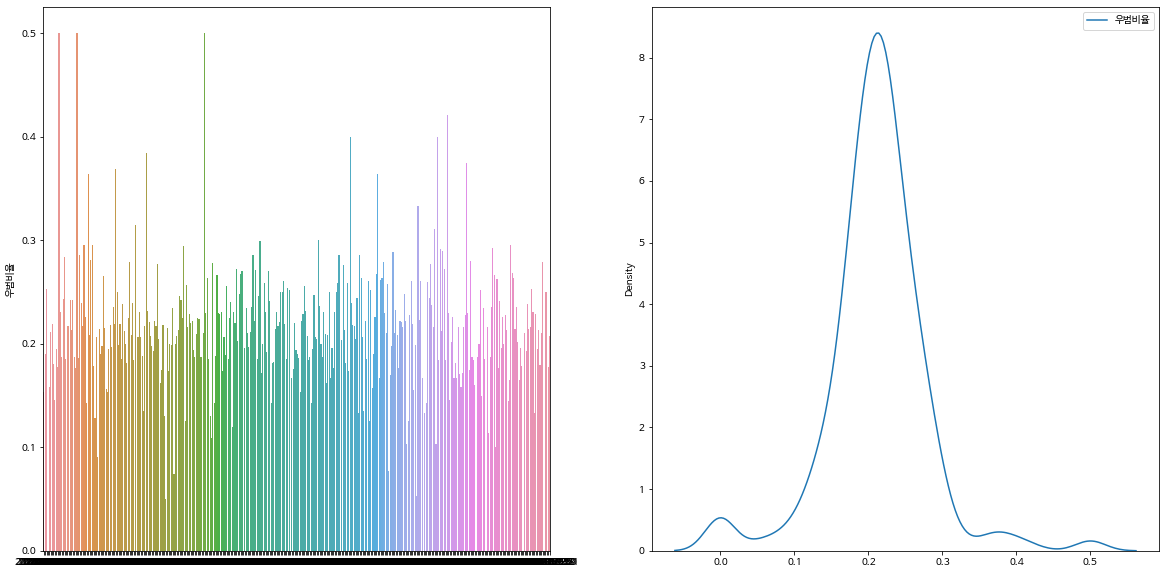

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.barplot(x = temp.index, y = temp['우범비율'], ax=ax[0])
sns.kdeplot(data = temp, ax=ax[1])

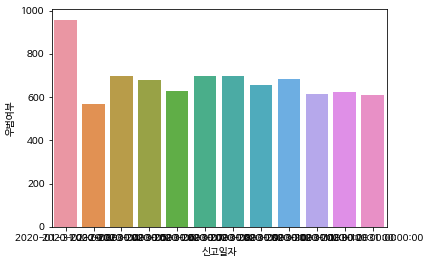

In [ ]:
df_t = pd.DataFrame(df.groupby(['신고일자'])['우범여부'].sum())
df_t.index = pd.to_datetime(df_t.index)
monthly_df = pd.DataFrame(df_t.resample(rule='M').sum())
sns.barplot(x = monthly_df.index, y = monthly_df['우범여부'])

#신고세관부호

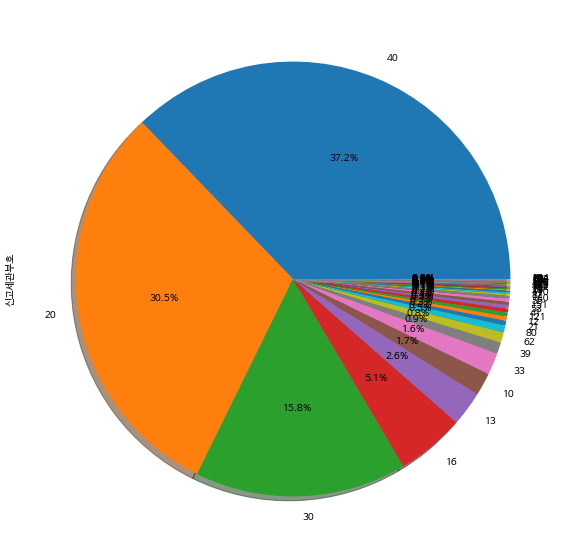

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
df['신고세관부호'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)
# 40 : 인천세관(공항), 20 : 인천세관(항), 30 : 부산세관에 대체로 분포한 모습

#수입신고구분코드

대부분 B이므로 학습에 안넣을 듯

In [ ]:
df['수입신고구분코드'].value_counts() 

#대체로 B(간이P/L신고)

B    37379
D        5
A        1
Name: 수입신고구분코드, dtype: int64

#수입거래구분코드


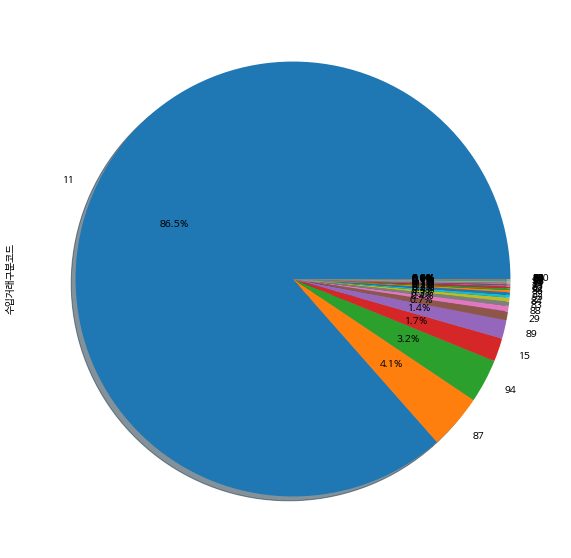

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
df['수입거래구분코드'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)
#11 : 일반형태수입, 87 : 무상반입 견품 및 광고용품, 94 : 기타 수입승인 면제물품

In [ ]:
pd.get_dummies(df[['수입거래구분코드', '우범여부']], columns=['수입거래구분코드']).corr().iloc[0][:]
#11과 87은 다른 코드에 비해 상관계수가 큰 것으로 보이나 크게 차이는 없어보임.

우범여부            1.000000
수입거래구분코드_11    -0.012816
수입거래구분코드_12     0.002638
수입거래구분코드_13    -0.006089
수입거래구분코드_15     0.009510
수입거래구분코드_21     0.000338
수입거래구분코드_22     0.005751
수입거래구분코드_29     0.003258
수입거래구분코드_49     0.005021
수입거래구분코드_51    -0.004620
수입거래구분코드_53     0.000827
수입거래구분코드_54    -0.003851
수입거래구분코드_55     0.003224
수입거래구분코드_59     0.003292
수입거래구분코드_71    -0.000063
수입거래구분코드_80    -0.007693
수입거래구분코드_83    -0.001030
수입거래구분코드_84    -0.006629
수입거래구분코드_85    -0.005659
수입거래구분코드_86    -0.005607
수입거래구분코드_87     0.012826
수입거래구분코드_88    -0.002029
수입거래구분코드_89     0.009292
수입거래구분코드_90    -0.000478
수입거래구분코드_92     0.001243
수입거래구분코드_93     0.004367
수입거래구분코드_94     0.001000
수입거래구분코드_96    -0.011556
수입거래구분코드_100    0.009823
Name: 우범여부, dtype: float64

#수입종류코드

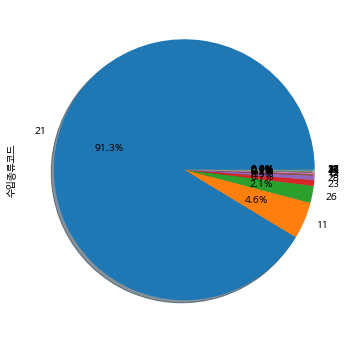

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))
df['수입종류코드'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)
#대부분 21 : 일반수입(내수용), 11 : 일반수입(외화획득용), 26 : 우편물품(국체우체국 면허분)

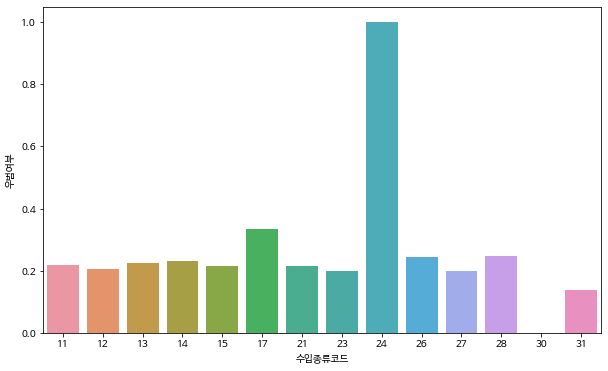

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
temp_c = df.groupby(['수입종류코드'])['우범여부'].mean().sort_values()
sns.barplot(x = temp_c.index, y =  temp_c)

In [ ]:
#pd.get_dummies(df[['수입종류코드', '수입거래구분코드']], columns=['수입종류코드', '수입거래구분코드']).corr()

#징수형태코드

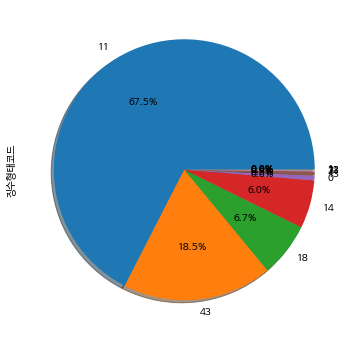

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))
df['징수형태코드'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)
#11 : 신고,수리전 납부, 43 : 월별납부 신용담보, 18 : 특송포괄납부, 14 : 신고,사후납부(무담보)

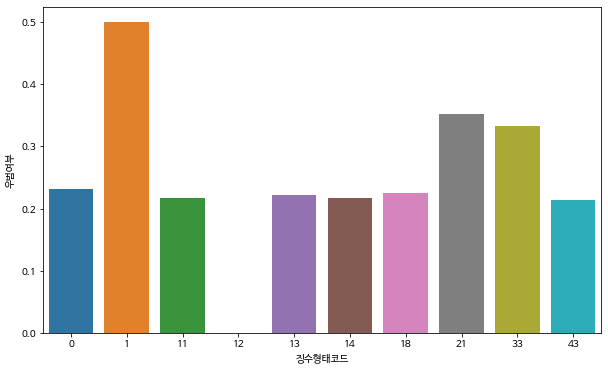

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
temp_c = df.groupby(['징수형태코드'])['우범여부'].mean().sort_values()
sns.barplot(x = temp_c.index, y =  temp_c)

#운송수단유형코드

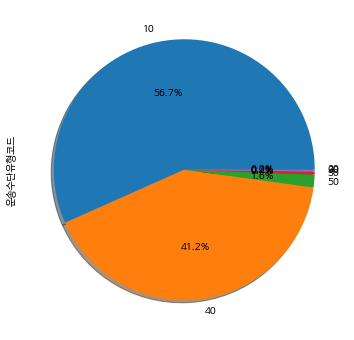

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))
df['운송수단유형코드'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)
#10 : 선박, 40 : 항공기

In [ ]:
pd.get_dummies(df[['운송수단유형코드', '우범여부']], columns=['운송수단유형코드']).corr()

,우범여부,운송수단유형코드_10,운송수단유형코드_20,운송수단유형코드_30,운송수단유형코드_40,운송수단유형코드_50,운송수단유형코드_90
우범여부,1.000000,-0.000622,-0.000676,-0.004433,-0.000999,0.005230,0.009371
운송수단유형코드_10,-0.000622,1.000000,-0.018704,-0.068583,-0.956353,-0.145297,-0.051610
운송수단유형코드_20,-0.000676,-0.018704,1.000000,-0.000981,-0.013680,-0.002078,-0.000738
운송수단유형코드_30,-0.004433,-0.068583,-0.000981,1.000000,-0.050161,-0.007621,-0.002707
운송수단유형코드_40,-0.000999,-0.956353,-0.013680,-0.050161,1.000000,-0.106269,-0.037747
운송수단유형코드_50,0.005230,-0.145297,-0.002078,-0.007621,-0.106269,1.000000,-0.005735
운송수단유형코드_90,0.009371,-0.051610,-0.000738,-0.002707,-0.037747,-0.005735,1.000000


#신고인부호

더 많이 신고한 사람의 수와 우범여부의 횟수 사이의 연관이 없는 것으로 보임

(200번 이상 신고한 관세사에게 발생한 우범횟수가 전체 통계와 큰 차이가 없음)

In [ ]:
df[df['신고인부호'].isin(df['신고인부호'].value_counts()[df['신고인부호'].value_counts()>=200].index)]['우범여부'].value_counts()/df[df['신고인부호'].isin(df['신고인부호'].value_counts()[df['신고인부호'].value_counts()>=200].index)]['우범여부'].count()

0    0.7882
1    0.2118
Name: 우범여부, dtype: float64

In [ ]:
df['우범여부'].value_counts()/df['우범여부'].count()

0    0.782961
1    0.217039
Name: 우범여부, dtype: float64

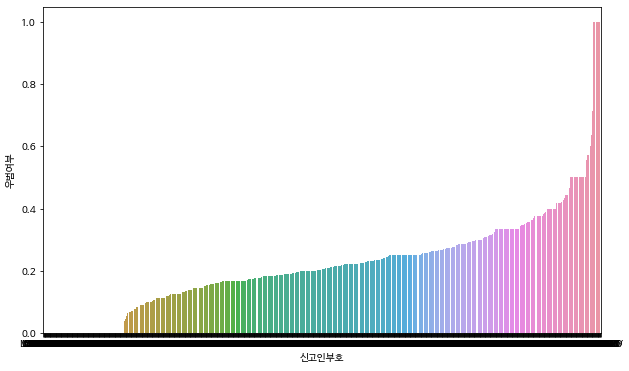

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
temp_c = df.groupby(['신고인부호'])['우범여부'].mean().sort_values()
temp_c
sns.barplot(x = temp_c.index, y =  temp_c)

(0.0, 100.0)

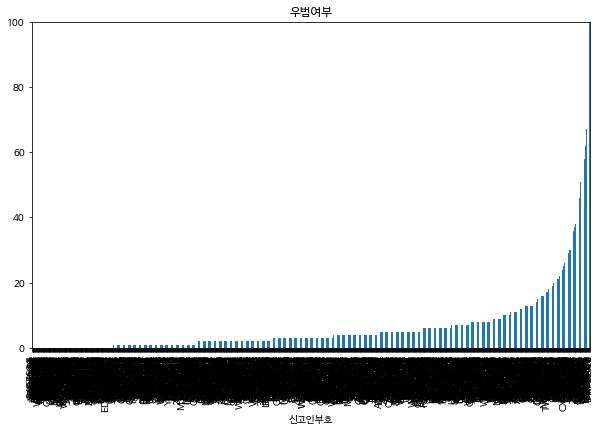

In [ ]:
df.groupby('신고인부호')['우범여부'].sum().sort_values().plot.bar(subplots=True, figsize=(10, 6))
plt.ylim(0, 100)

In [ ]:
temp_c

신고인부호
NHWIBH8    0.333333
N4676RJ    0.333333
MWRCPIX    0.333333
MT7AHQR    0.333333
BAH2UUA    0.333333
             ...   
9XHJAY4    1.000000
400IGWO    1.000000
LULXJDY    1.000000
GWXEJIJ    1.000000
HP6XG7Y    1.000000
Name: 우범여부, Length: 200, dtype: float64

In [ ]:
df[df['신고인부호'].isin(temp_c.index)]['우범여부'].mean()
df['우범여부'].mean()

0.21703891935268155

#수입자

특정 몇몇의 화주의 우범비율이 큰 것으로 확인됨

In [ ]:
df['수입자'].value_counts()

708A72F    139
1ZNY80M    131
NXZGW6G    120
PCW8KX7    110
7KGLWW5     98
          ... 
DMJ752L      1
RSMJMDO      1
1SX1RQH      1
FR7WCXC      1
0H58HO6      1
Name: 수입자, Length: 12720, dtype: int64

In [ ]:
df[df['수입자'].isin(df['수입자'].value_counts()[df['수입자'].value_counts()>=50].index)]['우범여부'].value_counts()/df[df['수입자'].isin(df['수입자'].value_counts()[df['수입자'].value_counts()>=50].index)]['우범여부'].count()

0    0.781804
1    0.218196
Name: 우범여부, dtype: float64

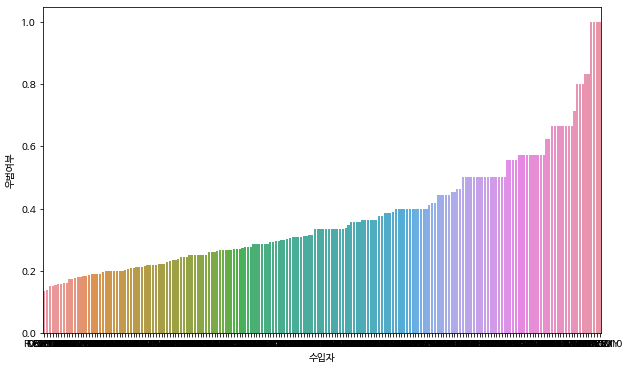

In [ ]:
temp_s = df.groupby(['수입자'])['우범여부'].sum().sort_values()[-200:] #우범횟수가 많은 상위 200명의 수입자
temp_ss = df[df['수입자'].isin(temp_s.index)][['수입자', '우범여부']].groupby('수입자')['우범여부'].mean().sort_values()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x = temp_ss.index, y = temp_ss)

#해외거래처부호

In [ ]:
df['해외거래처부호'].value_counts()

3EVLVZQ    171
7PN0VA5    171
Z64QME2    160
E44MM7Y    136
RZM2Z77    133
          ... 
CIDU9DA      1
G1ZOTEV      1
VMJ5YTM      1
81YS8XY      1
FCVT1BM      1
Name: 해외거래처부호, Length: 10536, dtype: int64

In [ ]:
df[df['해외거래처부호'].isin(df['해외거래처부호'].value_counts()[df['해외거래처부호'].value_counts()>=50].index)]['우범여부'].value_counts()/df[df['해외거래처부호'].isin(df['해외거래처부호'].value_counts()[df['해외거래처부호'].value_counts()>=50].index)]['우범여부'].count()

0    0.7779
1    0.2221
Name: 우범여부, dtype: float64

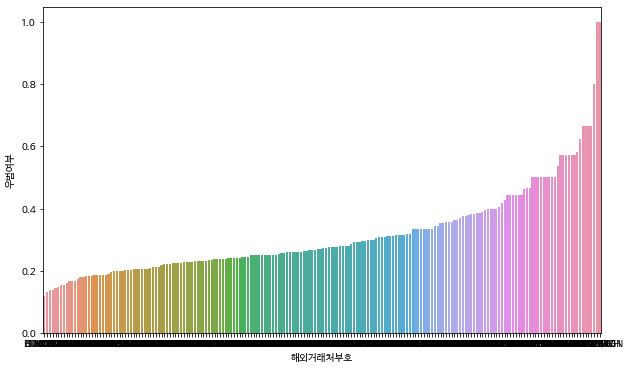

In [ ]:
temp_h = df.groupby(['해외거래처부호'])['우범여부'].sum().sort_values()[-200:] #우범횟수가 많은 상위 200개의 해외거래처부호
temp_hh = df[df['해외거래처부호'].isin(temp_h.index)][['해외거래처부호', '우범여부']].groupby('해외거래처부호')['우범여부'].mean().sort_values()
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x = temp_hh.index, y = temp_hh)
#데이터 중 전체 우범비율이 21%인것을 감안했을 때 꽤 큰 수치가 많이 보인다. 
#수입자와 비슷한 양상을 보인다

#특송업체부호
결측치가 많아서 pass

#HS10단위부호

  총 10자리. 6자리까지는 국제 통용, 7~10자리는 각 나라에서 세분화됨.

  관세율, 수입요건 등이 결정되므로 중요한 수입신고 목록 중 하나임

  1-2 : 류, 3-4 : 호, 5-6 : 소호, 7-10 : 국가별 상이

  각 단위로 나누는 과정 필요

In [ ]:
df['류'] = df['HS10단위부호'].apply(str).str[:2]
df['호'] = df['HS10단위부호'].apply(str).str[2:4]
df['소호'] = df['HS10단위부호'].apply(str).str[4:6]
df['세부품목'] = df['HS10단위부호'].apply(str).str[6:]

In [ ]:
df[['류', '호', '소호', '세부품목', '우범여부']]

,류,호,소호,세부품목,우범여부
0,44,08,90,9195,0
1,69,07,22,1000,0
2,62,08,22,1000,0
3,94,03,50,1000,0
4,71,08,07,000,0
...,...,...,...,...,...
37380,39,26,90,9000,1
37381,40,16,99,9000,1
37382,85,04,40,5090,0
37383,72,04,21,0000,0


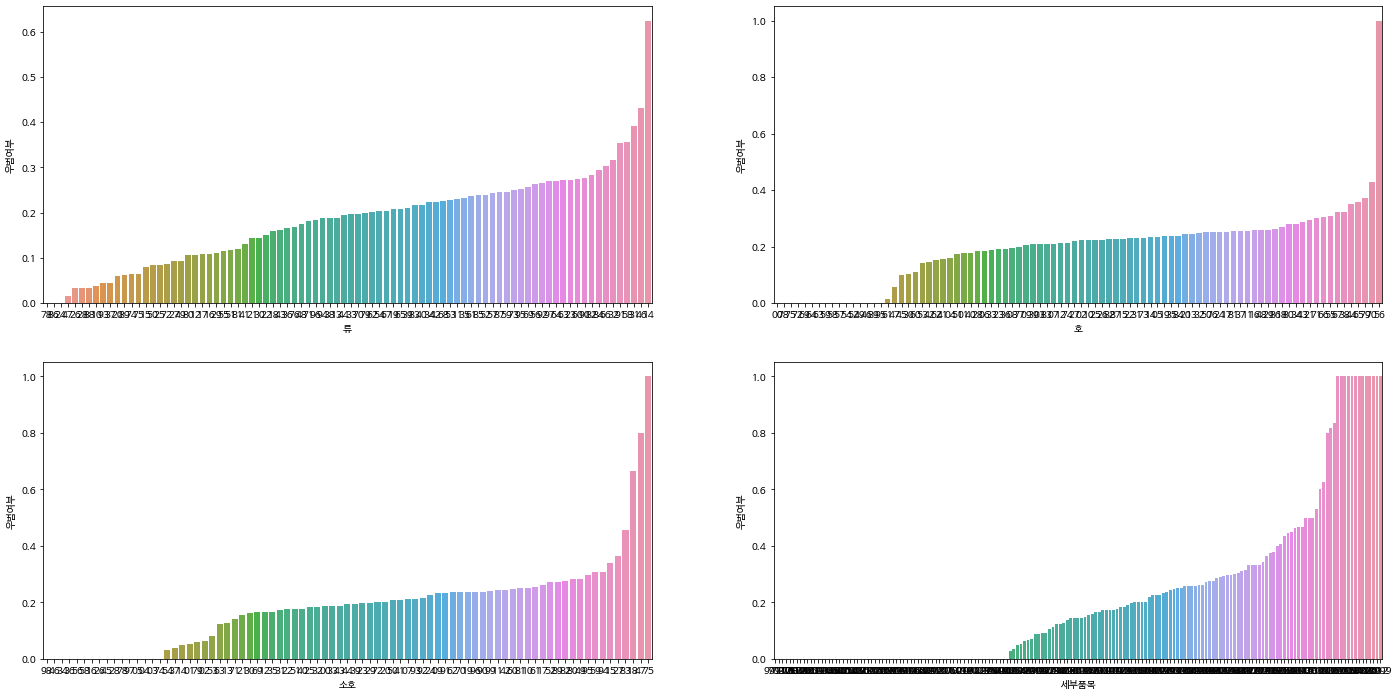

In [ ]:
t1 = df[['류', '우범여부']].groupby('류')['우범여부'].mean().sort_values()
t2 = df[['호', '우범여부']].groupby('호')['우범여부'].mean().sort_values()
t3 = df[['소호', '우범여부']].groupby('소호')['우범여부'].mean().sort_values()
t4 = df[['세부품목', '우범여부']].groupby('세부품목')['우범여부'].mean().sort_values()

fig, ax = plt.subplots(2, 2, figsize=(24, 12))

sns.barplot(x = t1.index, y = t1, ax = ax[0][0])
sns.barplot(x = t2.index, y = t2, ax = ax[0][1])
sns.barplot(x = t3.index, y = t3, ax = ax[1][0])
sns.barplot(x = t4.index, y = t4, ax = ax[1][1])

#우범비율이 큰 품목이 몇 있는 것으로 보임

#적출국가코드

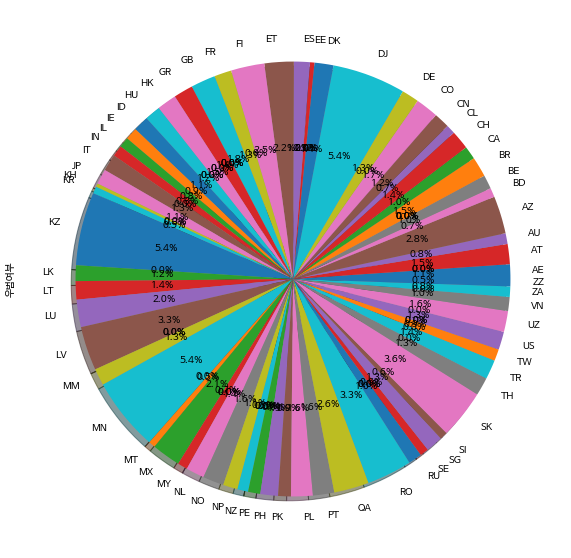

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
(df[['적출국가코드', '우범여부']].groupby(['적출국가코드'], as_index=True).mean()['우범여부']).plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)
#KZ, DJ, MN, RO 등 몇 나라의 우범비율이 높은것으로 보임

#원산지국가코드

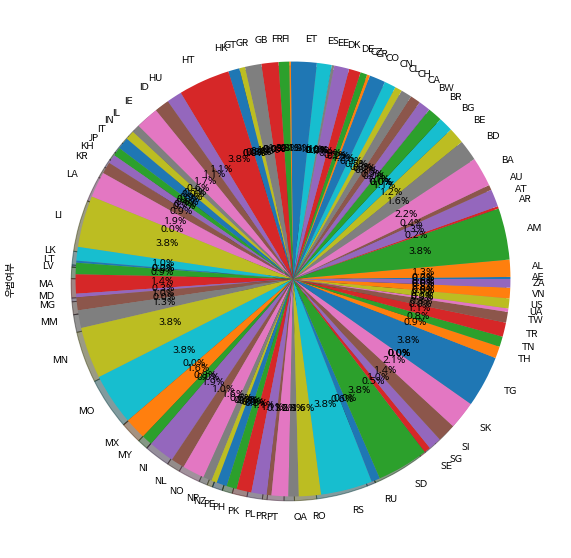

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
(df[['원산지국가코드', '우범여부']].groupby(['원산지국가코드'], as_index=True).mean()['우범여부']).plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)
#몇 나라를 원산지로 한 물품의 우범 비율이 높은 것으로 나타남. 유의미한 수치인지는 더 볼 필요가 있음

#관세율

관세율과 우범여부는 나름 연관이 있는 듯함

관세율은 HS10단위부호와 연관됨

In [ ]:
pd.get_dummies(df[['관세율', '우범여부']], columns=['관세율']).corr().abs().sort_values(by=['우범여부'])['우범여부'][-20:]

관세율_45.0     0.016363
관세율_71.0     0.017015
관세율_20.0     0.017247
관세율_27.0     0.017279
관세율_14.0     0.017280
관세율_8.1      0.017361
관세율_5.5      0.018317
관세율_50.0     0.018878
관세율_2.0      0.019050
관세율_135.0    0.019068
관세율_10.0     0.019378
관세율_57.5     0.019616
관세율_2.6      0.020118
관세율_554.8    0.021967
관세율_377.3    0.022665
관세율_13.0     0.023756
관세율_360.0    0.025455
관세율_0.0      0.040765
관세율_8.0      0.066022
우범여부         1.000000
Name: 우범여부, dtype: float64

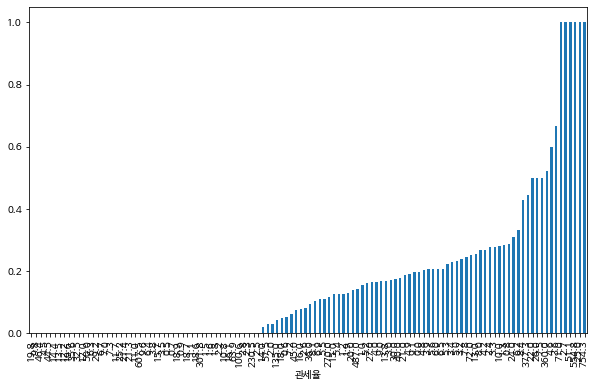

In [ ]:
df.groupby('관세율')['우범여부'].mean().sort_values().plot.bar(figsize=(10, 6))

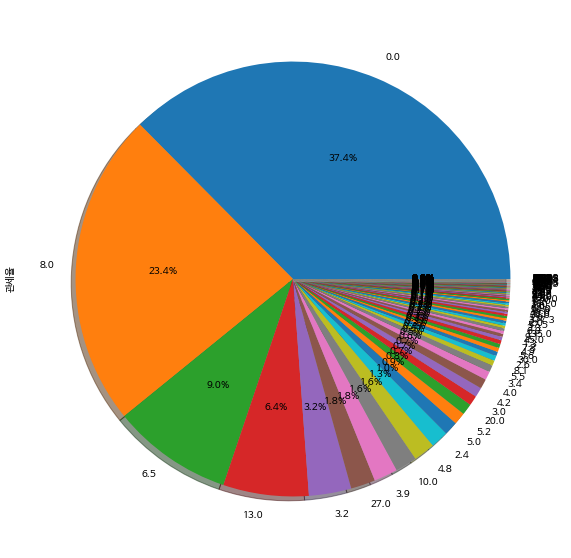

In [ ]:
df['관세율'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(10, 10))

#관세율구분코드

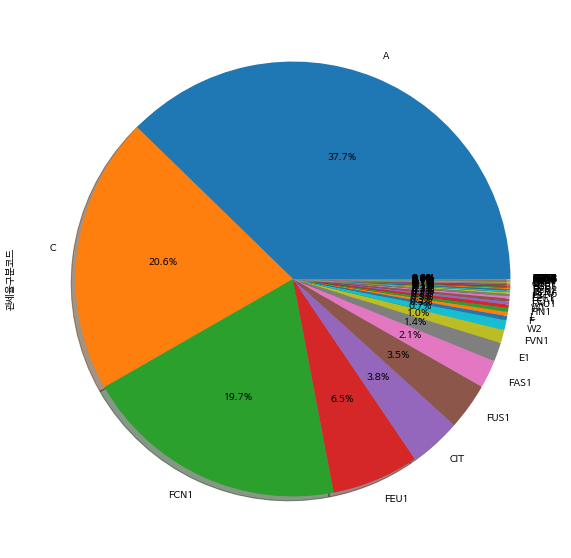

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
df['관세율구분코드'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)

#원산지표시유무코드

In [ ]:
pd.get_dummies(df[['원산지표시유무코드', '우범여부']], columns=['원산지표시유무코드']).corr()

,우범여부,원산지표시유무코드_B,원산지표시유무코드_E,원산지표시유무코드_G,원산지표시유무코드_N,원산지표시유무코드_S,원산지표시유무코드_Y
우범여부,1.000000,0.001504,-0.001231,-0.002405,-0.002463,0.004577,-0.001100
원산지표시유무코드_B,0.001504,1.000000,-0.260679,-0.224212,-0.005659,-0.156938,-0.217232
원산지표시유무코드_E,-0.001231,-0.260679,1.000000,-0.341819,-0.008627,-0.239258,-0.331178
원산지표시유무코드_G,-0.002405,-0.224212,-0.341819,1.000000,-0.007420,-0.205788,-0.284849
원산지표시유무코드_N,-0.002463,-0.005659,-0.008627,-0.007420,1.000000,-0.005194,-0.007189
원산지표시유무코드_S,0.004577,-0.156938,-0.239258,-0.205788,-0.005194,1.000000,-0.199381
원산지표시유무코드_Y,-0.001100,-0.217232,-0.331178,-0.284849,-0.007189,-0.199381,1.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c03b58510>],
      dtype=object)

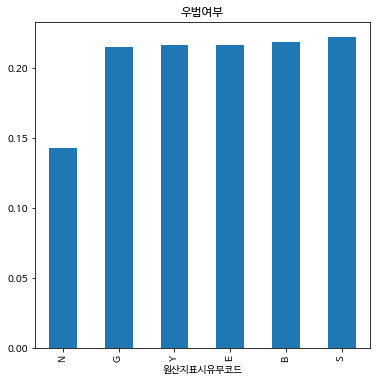

In [ ]:
df[['원산지표시유무코드', '우범여부']].groupby('원산지표시유무코드')['우범여부'].mean().sort_values().plot.bar(subplots=True, figsize=(6, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c033c4ad0>],
      dtype=object)

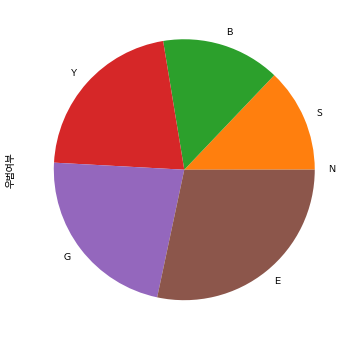

In [ ]:
df[['원산지표시유무코드', '우범여부']].groupby('원산지표시유무코드')['우범여부'].sum().sort_values().plot.pie(subplots=True, figsize=(6, 6))

#신고중량(KG)

In [ ]:
df['신고중량(KG)'].describe()
df['신고중량(KG)'].max()

60025000.0

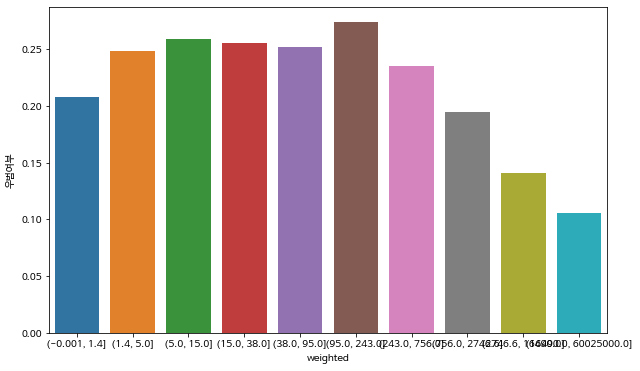

In [ ]:
df['weighted'] = pd.qcut(df['신고중량(KG)'], 10)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x = df.groupby('weighted')['우범여부'].mean().index, y = df.groupby('weighted')['우범여부'].mean())
#우범비율이 유난히 높은 중량 구간이 존재함

#과세가격원화금액

In [ ]:
df['과세가격원화금액'].describe()
df['과세가격원화금액'].max()

7045681618.1

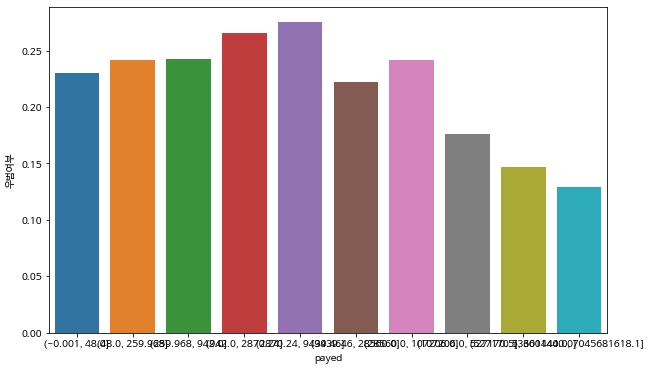

In [ ]:
df['payed'] = pd.qcut(df['과세가격원화금액'], 10)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x = df.groupby('payed')['우범여부'].mean().index, y = df.groupby('payed')['우범여부'].mean())
#우범비율이 유난히 높은 과세 구간이 존재함
#비례하는것으로 나타나지는 않음

#결과

고르게 분포하는 데이터가 많은 것으로 보아 상관관계가 복잡하게 얽혀있을 가능성이 크다

따라서 NN모델 보다는 Decision Tree쪽을 사용해볼것을 검토

상관관계가 서로 큰 데이터는 중복되지 않게 데이터 한쪽을 제거하고, 분포가 고르게 나타난 데이터만 학습에 사용해보도록 함

신고번호, 신고일자, 

In [ ]:
df_h = df[df['우범여부'] != 0]
df_h

,id,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,...,신고중량(KG),과세가격원화금액,우범여부,핵심적발,류,호,소호,세부품목,weighted,payed
5,5,38459034,2020-01-01,40,B,11,21,11,10,OZB7KED,...,2.0,29078.80,1,1,85,17,12,9090,"(1.4, 5.0]","(28560.0, 107206.0]"
12,12,58493150,2020-01-01,20,B,11,21,11,10,B0Y0ROB,...,14.4,2547.36,1,1,85,44,42,9010,"(5.0, 15.0]","(942.0, 2870.24]"
17,17,91408622,2020-01-01,40,B,93,21,43,40,GWX4PNW,...,110.0,50127.00,1,1,85,25,80,3000,"(95.0, 243.0]","(28560.0, 107206.0]"
24,24,51313213,2020-01-01,16,B,94,26,43,40,M2URW6J,...,24.5,10106.25,1,1,39,11,90,9000,"(15.0, 38.0]","(9439.46, 28560.0]"
27,27,47431706,2020-01-02,30,B,11,11,11,10,ZQJIYI3,...,228.2,136.92,1,1,39,26,90,9000,"(95.0, 243.0]","(48.0, 259.968]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37365,37365,75372961,2020-12-31,40,B,11,21,11,40,DGIRSXL,...,384.1,41060.29,1,2,62,14,30,0000,"(243.0, 756.0]","(28560.0, 107206.0]"
37369,37369,97096015,2020-12-31,16,B,11,21,11,10,7YOSHYM,...,4.9,15967.63,1,1,90,27,80,2090,"(1.4, 5.0]","(9439.46, 28560.0]"
37374,37374,17222067,2020-12-31,13,B,11,21,43,40,1K9FBW0,...,20.0,50008.00,1,1,35,04,00,2010,"(15.0, 38.0]","(28560.0, 107206.0]"
37380,37380,78236084,2020-12-31,40,B,11,21,43,40,NZYZ967,...,573.0,343.80,1,1,39,26,90,9000,"(243.0, 756.0]","(259.968, 942.0]"


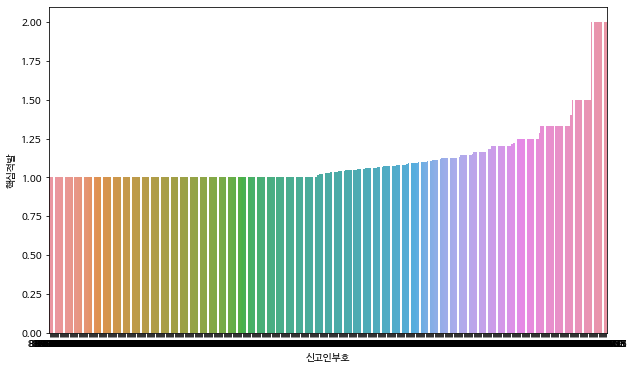

In [ ]:
#신고인부호
#일부 100% 핵심적발로 구분되는 신고인부호가 있음
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
temp_c = df_h.groupby(['신고인부호'])['핵심적발'].mean().sort_values()[-500:]
temp_c
sns.barplot(x = temp_c.index, y =  temp_c)

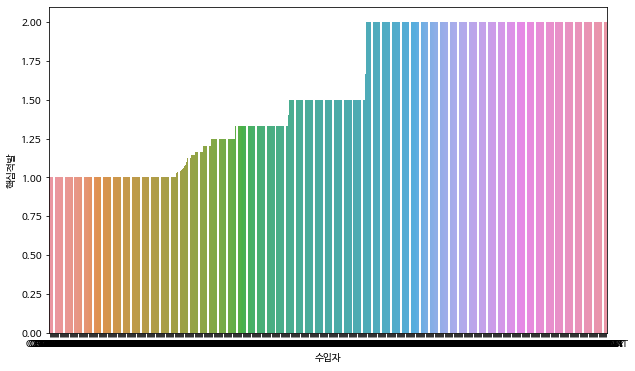

In [ ]:
#수입자
#수입자에 따라 핵심여부가 확실한것으로 보임
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
temp_c = df_h.groupby(['수입자'])['핵심적발'].mean().sort_values()[-500:]
temp_c
sns.barplot(x = temp_c.index, y =  temp_c)

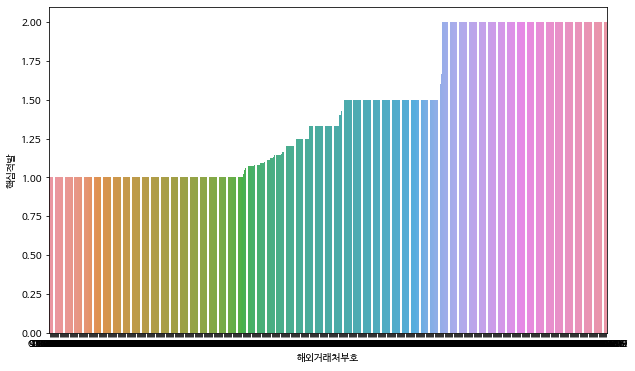

In [ ]:
#해외거래처부호
#일부 100% 핵심적발로 구분되는 해외거래처부호가 있음
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
temp_c = df_h.groupby(['해외거래처부호'])['핵심적발'].mean().sort_values()[-500:]
temp_c
sns.barplot(x = temp_c.index, y =  temp_c)

수입자 > 해외거래처부호 > 신고인부호 순으로 핵심적발 여부가 갈림

In [ ]:
df_h.count()

id           8114
신고번호         8114
신고일자         8114
신고세관부호       8114
수입신고구분코드     8114
수입거래구분코드     8114
수입종류코드       8114
징수형태코드       8114
운송수단유형코드     8114
신고인부호        8114
수입자          8114
해외거래처부호      7338
특송업체부호       1465
HS10단위부호     8114
적출국가코드       8114
원산지국가코드      8114
관세율          8114
관세율구분코드      8114
원산지표시유무코드    8114
신고중량(KG)     8114
과세가격원화금액     8114
우범여부         8114
핵심적발         8114
류            8114
호            8114
소호           8114
세부품목         8114
weighted     8114
payed        8114
dtype: int64

In [ ]:
df_h['핵심적발'].mean()
#총 8114개의 우범여부==1, 그중 394개의 핵심적발

1.0485580478185852

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


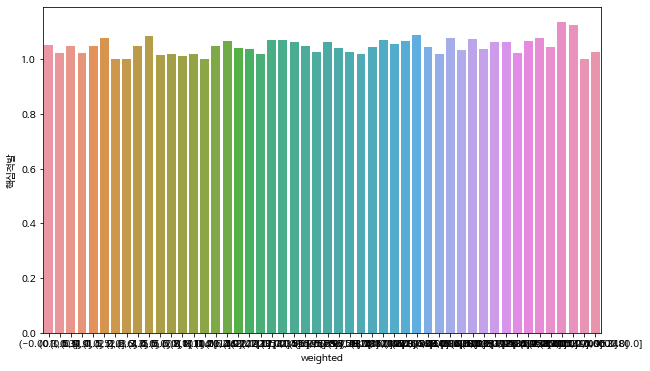

In [ ]:
df_h['weighted'] = pd.qcut(df_h['신고중량(KG)'], 50)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x = df_h.groupby('weighted')['핵심적발'].mean().index, y = df_h.groupby('weighted')['핵심적발'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


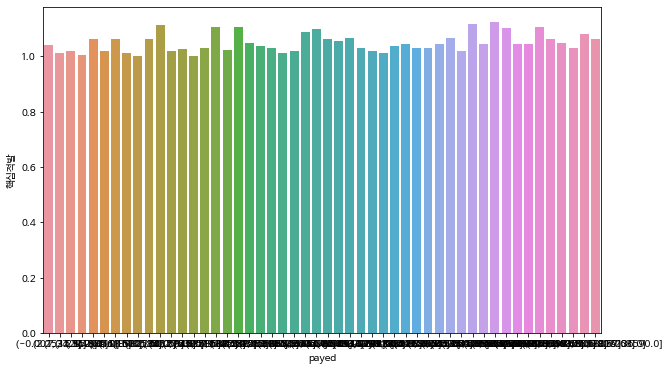

In [ ]:
df_h['payed'] = pd.qcut(df_h['과세가격원화금액'], 50)
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.barplot(x = df_h.groupby('payed')['핵심적발'].mean().index, y = df_h.groupby('payed')['핵심적발'].mean())

신고중량과 과세가격원화금액에 따른 핵심적발 비율은 각 구역마다 1.1 이내로 평균값인 1.04에 비해 큰 차이가 없기때문에 별로 중요하지 않다고 판단함 (대략 5%차이)

In [ ]:
df_h

,id,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,...,신고중량(KG),과세가격원화금액,우범여부,핵심적발,류,호,소호,세부품목,weighted,payed
5,5,38459034,2020-01-01,40,B,11,21,11,10,OZB7KED,...,2.0,29078.80,1,1,85,17,12,9090,"(1.5, 2.0]","(28507.2, 34125.0]"
12,12,58493150,2020-01-01,20,B,11,21,11,10,B0Y0ROB,...,14.4,2547.36,1,1,85,44,42,9010,"(14.0, 16.242]","(2263.665, 2606.4]"
17,17,91408622,2020-01-01,40,B,93,21,43,40,GWX4PNW,...,110.0,50127.00,1,1,85,25,80,3000,"(103.0, 120.0]","(44344.445, 53170.584]"
24,24,51313213,2020-01-01,16,B,94,26,43,40,M2URW6J,...,24.5,10106.25,1,1,39,11,90,9000,"(22.1, 27.12]","(9709.902, 11329.88]"
27,27,47431706,2020-01-02,30,B,11,11,11,10,ZQJIYI3,...,228.2,136.92,1,1,39,26,90,9000,"(228.0, 264.06]","(118.582, 151.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37365,37365,75372961,2020-12-31,40,B,11,21,11,40,DGIRSXL,...,384.1,41060.29,1,2,62,14,30,0000,"(332.08, 410.0]","(34125.0, 44344.445]"
37369,37369,97096015,2020-12-31,16,B,11,21,11,10,7YOSHYM,...,4.9,15967.63,1,1,90,27,80,2090,"(4.0, 5.0]","(14493.34, 17683.5]"
37374,37374,17222067,2020-12-31,13,B,11,21,43,40,1K9FBW0,...,20.0,50008.00,1,1,35,04,00,2010,"(19.0, 22.1]","(44344.445, 53170.584]"
37380,37380,78236084,2020-12-31,40,B,11,21,43,40,NZYZ967,...,573.0,343.80,1,1,39,26,90,9000,"(500.0, 605.7]","(270.0, 345.0]"


In [ ]:
df_h[df_h['관세율']==7.5]

,id,신고번호,신고일자,신고세관부호,수입신고구분코드,수입거래구분코드,수입종류코드,징수형태코드,운송수단유형코드,신고인부호,...,신고중량(KG),과세가격원화금액,우범여부,핵심적발,류,호,소호,세부품목,weighted,payed
4911,4911,58421238,2020-02-06,20,B,11,11,11,10,7YOSHYM,...,1.7,675.92,1,2,85,26,92,0000,"(1.5, 2.0]","(637.28, 802.519]"
23515,23515,15550724,2020-08-06,30,B,94,21,14,10,89L3UKQ,...,1.7,675.92,1,2,85,26,92,0000,"(1.5, 2.0]","(637.28, 802.519]"
30280,30280,77957147,2020-10-19,40,B,94,21,43,40,OZB7KED,...,1.7,675.92,1,2,85,26,92,0000,"(1.5, 2.0]","(637.28, 802.519]"


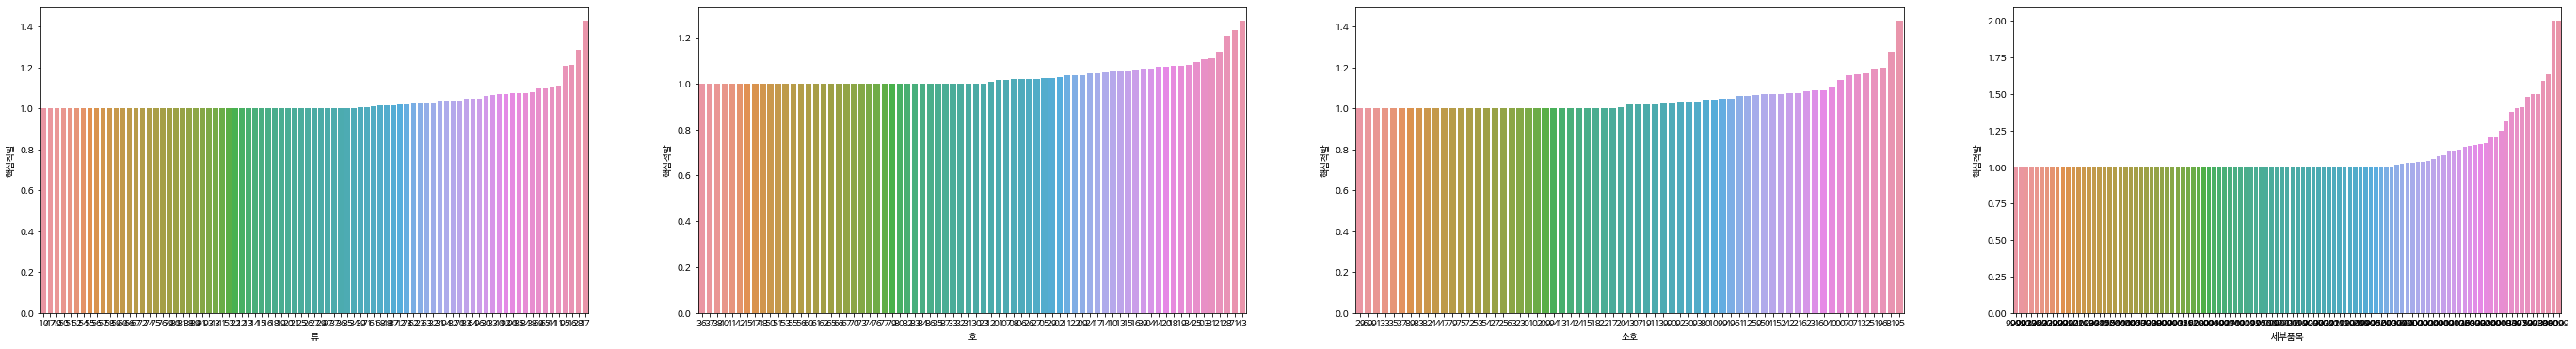

In [ ]:
t1 = df_h[['류', '핵심적발']].groupby('류')['핵심적발'].mean().sort_values()
t2 = df_h[['호', '핵심적발']].groupby('호')['핵심적발'].mean().sort_values()
t3 = df_h[['소호', '핵심적발']].groupby('소호')['핵심적발'].mean().sort_values()
t4 = df_h[['세부품목', '핵심적발']].groupby('세부품목')['핵심적발'].mean().sort_values()

fig, ax = plt.subplots(1, 4, figsize=(48, 6))

sns.barplot(x = t1.index, y = t1, ax = ax[0])
sns.barplot(x = t2.index, y = t2, ax = ax[1])
sns.barplot(x = t3.index, y = t3, ax = ax[2])
sns.barplot(x = t4.index, y = t4, ax = ax[3])
#세부품목을 제외하고는 눈에 두드러지게 나타나는 특성은 없는듯하나 충분히 따져볼 가치가 있음

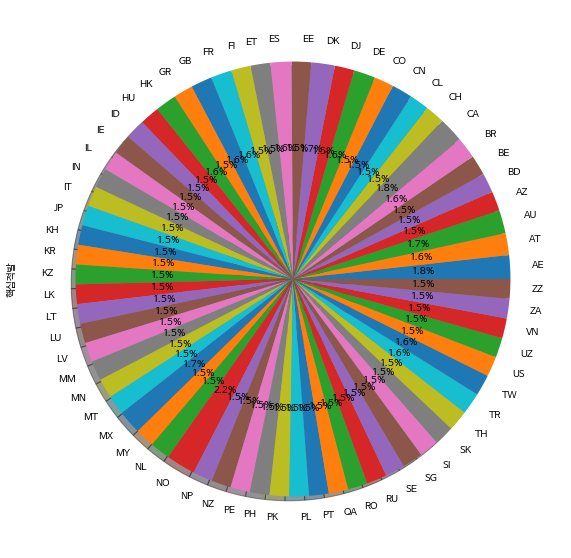

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
(df_h[['적출국가코드', '핵심적발']].groupby(['적출국가코드'], as_index=True).mean()['핵심적발']).plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)

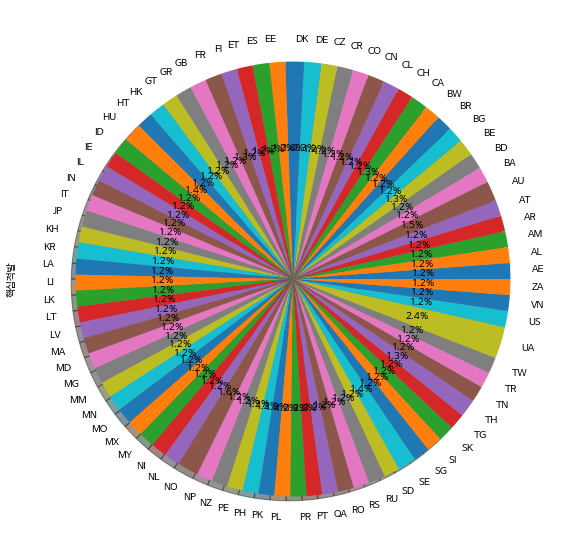

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 10))
(df_h[['원산지국가코드', '핵심적발']].groupby(['원산지국가코드'], as_index=True).mean()['핵심적발']).plot.pie(autopct='%1.1f%%', ax=ax, shadow=True)